<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_0919_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 9장 비지도 학습 p.328~347

## 9.2 가우시안 혼합

- 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 하나의 가우시안 분포에서 생성된 모든 샘플 -> 하나의 클러스터 형상 (타원형)

-  GaussianMixture 클래스에 구현: 가우시안 부포 개수 k를 알아야함



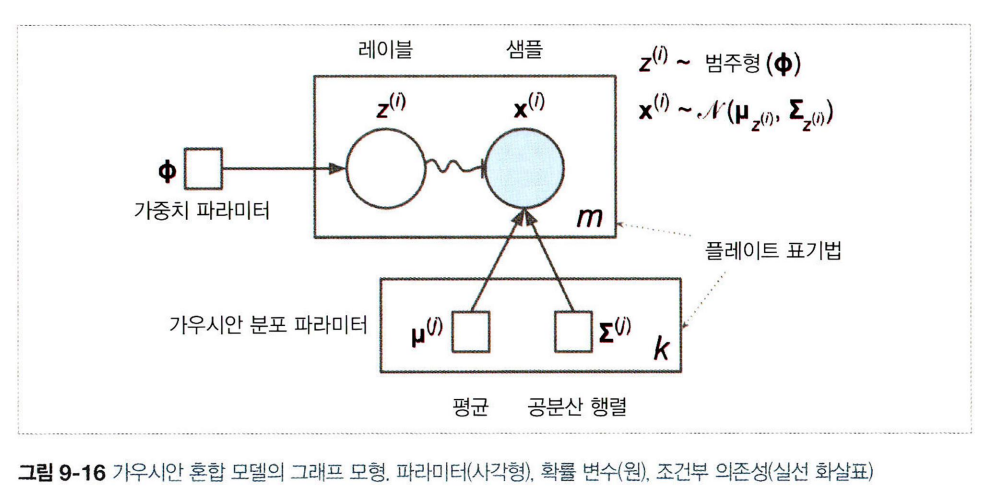

- 원: 확률변수
- 사각형: 고정값(파라미터)
- 큰 사각형: 플레이트
- 각 플레이트 오른쪽 아래 숫자는 얼마나 플레이트 안의 내용이 반복되는지 표시
- 각 변수 z는 가중치를 갖는 범주형 분포에서 샘플링
- 실선 화살표: 조건부 의존성
- 구불구불한 화살표: 스위피
- 색이 채워진 원: 알려진 값(관측변수), 알려지지 않은 확률변수(잠재변수)

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=0.05)

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [3]:
# 이 알고리즘이 추정한 파라미터
gm.weights_
gm.means_
gm.covariances_

array([[[ 0.05507341,  0.06366373],
        [ 0.06366373,  0.08926283]],

       [[ 0.05490782,  0.06269303],
        [ 0.06269303,  0.08823169]],

       [[ 0.16659288, -0.09936696],
        [-0.09936696,  0.29140452]]])

- 가중치 0.2, 0.4, 0.4
- 기댓값-최대화 알고리즘 사용
1. 샘플을 클러스터에 할당 (기댓값 단계)
2. 클러스터 어베이트 (최대화 단계)
- 소프트 클러스터 할당
-  기댓값 단계에서 알고리즘은 각 클러스터에 속할 확률을 예측 -> 최대화
단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트 -> 클러스터에 속할 추정 확률로 샘플에 가중치가 적용 이 확률을 샘플에 대한 클러스터의 책임



In [4]:
# 알고리즘이 수렴했는지 여부와 반복횟수 확인
gm.converged_
gm.n_iter_

15

- 이 모델은 새로운 샘플을 가장 비슷한 클러스터에 손쉽게 할당할 수 있습니다(하드 군집).
- 또는 특정 클러스
터에 속할 확률을 예측할 수 있습니다(소프트 군집).

In [5]:
gm.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2,
       2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1,

- 가우시안 혼합모델은 생성모델

In [6]:
gm.predict_proba(X)

array([[1.10645324e-052, 2.33462496e-041, 1.00000000e+000],
       [8.77144854e-027, 8.86552548e-071, 1.00000000e+000],
       [1.27777208e-057, 1.12186213e-037, 1.00000000e+000],
       ...,
       [9.99687286e-001, 2.70509413e-172, 3.12713791e-004],
       [2.65287629e-180, 8.14275766e-001, 1.85724234e-001],
       [3.55871489e-182, 9.99686759e-001, 3.13241119e-004]])

In [7]:
#모델의 밓도 측정
X_new, y_new = gm.sample(6)

In [8]:
X_new

array([[-0.79128657,  0.38880457],
       [ 0.45307669, -0.01190448],
       [ 0.97355525,  0.68360358],
       [-0.10717833,  0.43922043],
       [ 0.13849508,  0.96498841],
       [ 0.71906658, -0.48094024]])

In [9]:
y_new

array([0, 2, 2, 2, 2, 2])

In [10]:
gm.score_samples(X)

array([-1.52784566e+00, -1.61682065e+00, -1.54728224e+00, -1.45851175e+00,
       -1.87782545e+00, -1.16569941e+00, -1.80698506e+00, -1.93739271e-01,
       -1.68451305e+00, -2.35562729e+00, -1.66501652e+00, -3.11457048e-01,
       -2.43052940e-01, -1.48199408e+00, -1.42686676e+00, -1.32928975e+00,
       -1.12579089e+00, -2.62952449e-01, -1.69385830e+00, -1.82107648e+00,
       -1.60523520e+00, -1.60728986e+00, -1.59410824e+00, -2.21662914e+00,
       -1.26017857e+00, -1.55885189e+00, -1.73588214e+00, -3.74058320e-01,
       -1.83716043e+00, -1.46223593e+00, -2.23585204e+00, -1.49757247e+00,
       -1.51529797e+00, -1.74066346e+00, -1.82160528e+00, -1.15502172e+00,
       -1.41086091e+00, -2.89148399e-01, -1.81326494e+00, -1.88843978e+00,
       -1.59435722e+00, -4.63894165e-01, -1.32394989e+00, -1.81366373e+00,
       -1.62217087e+00, -5.16352699e-01, -3.44485550e-01, -1.33002041e+00,
       -5.84716373e-02, -1.67848854e+00, -1.82866433e+00, -7.88930699e-01,
       -5.07768371e-01,  

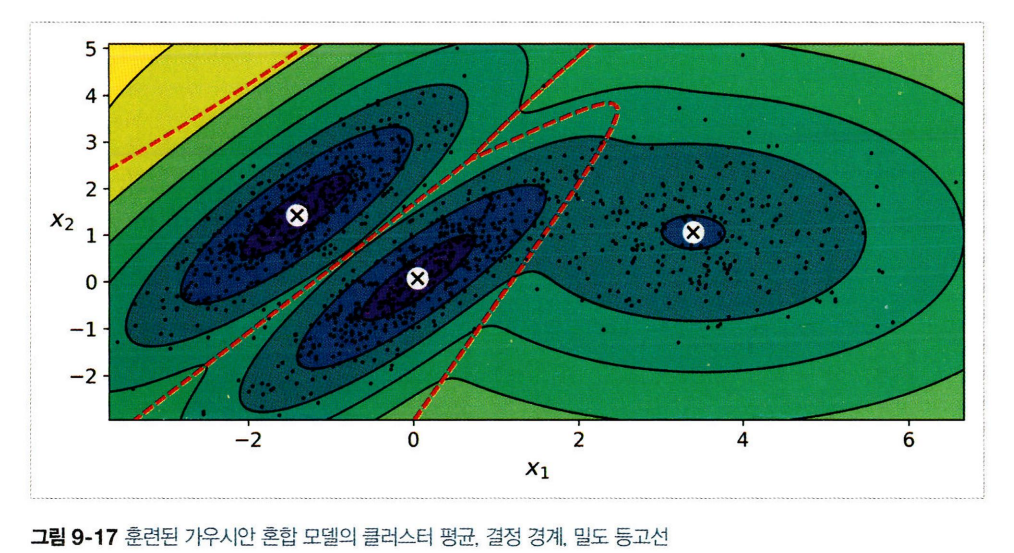

- 이 점수의 지숫값을 계산하면 샘플의 위치에서 PDF 값을 얻을 수 있음
- covariance_type: "spherical"(모두 원형), "diag"(타원형, 공분산 행렬이 대각 행렬), "tied"(모두 동일한 타원모양, 크기, 방향), "full"(기본형, 제약 없음)

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

- 밀도가 낮은 지역에 있는 모든 샘플을 이상치.사용할 밀도 임곗값을 정해야 함

In [11]:
import numpy as np

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

이와 비슷한 작업으로는 특이치 탐지가 있다. 이 알고리즘은 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련해야한다.

## 9.2.2 클러스터 개수 선택하기

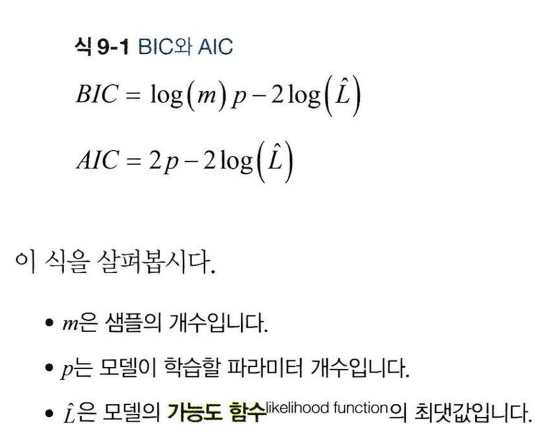

- BIC나 AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음
- AIC와 BIC는 모두 학습할 파라미터가 많은(클러스터가 많은) 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함

**가능도함수**
- 확률과 가능도는 비슷하지만 다르다. 확률 모델이 주어지면 '확률'은 미래 출력 x가 얼마나 그럴듯한지 설명하고, '가능도'는 출력 x를 알고 있을 때 특정 파라미터 값이 얼마나 그럴듯한지 설명한다. 간단히 말해, PDF는 x의 함수이고, 가능도 함수는 theta의 함수이다.




In [12]:
gm.bic(X)

np.float64(2777.075983809436)

In [13]:
gm.aic(X)

np.float64(2693.6441440667395)

- k=3일 때, AIC와 BIC가 모두 가장 작다. 또는, covariance_type 매개변수에 대해 최선의 값을 탐색할 수도 있다.

## 9.2.3 베이즈 가우시안 혼합 모델

- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있다.
- 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다

In [14]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.13, 0.12, 0.1 , 0.17, 0.15, 0.1 , 0.09, 0.  , 0.  ])

## 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
- PCA
- Fast_MCD
- 아이솔레이션 포레스트
- LOF
- one-class SVM